In [77]:
import numpy as np


Data = np.genfromtxt('MålingerKM2.csv', delimiter = ";", skip_header = 1)


R = 1 #Resistor Impedance [Ohm]
R_err = 0.01 #[Ohm]
r = 29.5/(2 * 100) #Radius of Coil [m]
z0 = 1/2 * r 
r_err = 1/1000 # [m]

Z = Data[0][-1] #Impedance of Coil
Z_err = 0.01

mu = 1.25663706 * 10**(-6) # m*kg/(A^2 * s^2)
n = 245 #antal vindinger i spolen[N]
n_err = 10
f = Data[:,2]
Vmax = Data[:,1]
Vmin = Data[:,0]
V_err = 0.02# [V]
I = Vmin/R #Current

I_err = np.sqrt((V_err/R)**2 + ((Vmin/R**2)*R_err)**2)


B = (n * mu * r**2)/((r**2 + z0**2)**(3/2)) * I #Magnitude of magnetic field



print(B_err_I * I_err)

B_err_n =  (mu * R**2 * Vmin)/((R**2 + r**2)**(3/2)) * I
B_err_R = (2*mu*n*R*Vmin/(((R**2 + r**2)**(3/2))*np.sqrt(R**2 + Z**2)) - 3 * mu *n * R**3 * Vmin /(((R**2+ r**2)**(5/2))*np.sqrt(R**2 + Z**2)) - mu * n * R**3 * Vmin / (((R**2+ r**2)**(3/2))*np.sqrt(R**2 + Z**2) * (R**2 + Z**2))) * I
B_err_r = -3 * mu * n * R**2 * Vmin * r / (((R**2 + r**2)**(5/2))*np.sqrt(R**2 + Z**2)) * I
B_err_V = mu*n*R**2/(((R**2 + r**2)**(3/2))*np.sqrt(R**2 + Z**2)) * I
B_err_Z = -mu*n*R**2 * Vmin * Z / (((R**2 + r**2)**(3/2))*np.sqrt(R**2 + Z**2) * (R**2 + Z**2)) * I
B_err_I = (n * mu * r**2)/((r**2 + z0**2)**(3/2))

B_err = np.sqrt((B_err_n * n_err)**2 + (B_err_R * R_err)**2 + (B_err_r * r_err)**2 + (B_err_V * V_err)**2 + (B_err_Z * Z_err)**2 + (B_err_I * I_err)**2)

[3.34637874e-05 3.30120559e-05 3.23410707e-05 3.19655498e-05
 3.40262700e-05 3.52728133e-05 3.52252367e-05 3.61312492e-05]


-12715.185603102105
559.816725168724


C:\Users\Bruger\AppData\Local\Temp\ipykernel_7212\2013688549.py:25: RuntimeWarning: invalid value encountered in sqrt
  errors = np.diag(np.sqrt(cov))


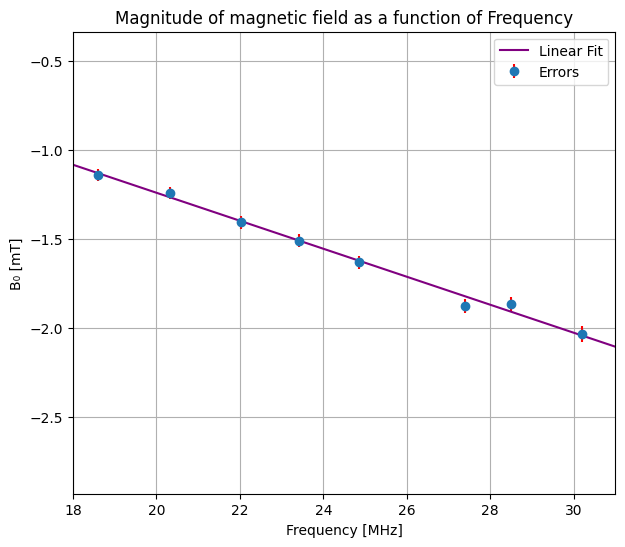

In [81]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


def fit(x, a, b):
    return a*x + b

par, cov = curve_fit(fit, f, B, sigma = B_err, absolute_sigma = True)


plt.figure(figsize = (7,6))
plt.grid()
plt.title('Magnitude of magnetic field as a function of Frequency', size = 12)
plt.xlabel('Frequency [MHz]', size = 10)
plt.ylabel('B\u2080 [mT]', size = 10)
plt.xlim(18, 31)
plt.errorbar(f, 1000 * B, yerr = 1000 * B_err, fmt = "o", ecolor = 'red', label = "Errors")
x = np.linspace(10, 40, 1000)
plt.plot(x, 1000 * fit(x, *par), color = 'purple', label = 'Linear Fit')
plt.legend()



print(1/par[0])
errors = np.diag(np.sqrt(cov))
print(1/par[0]**2 * errors[0])

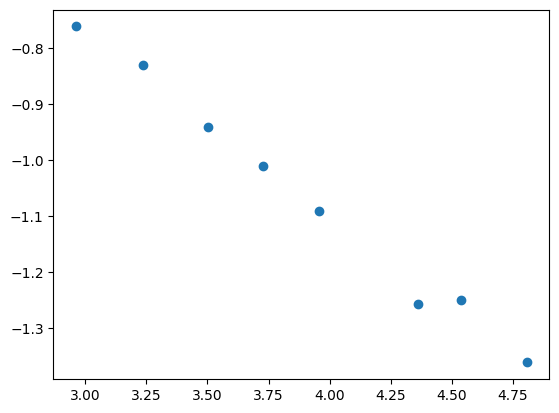

In [54]:
plt.plot(f, Vmin, 'o')